In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd

In [3]:
movie=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/basic_movie.tsv',sep='\t')
movie_data=movie[['numVotes']]

In [4]:
movie.info()    # null값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311568 entries, 0 to 1311567
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1311568 non-null  object 
 1   averageRating  1311568 non-null  float64
 2   numVotes       1311568 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 30.0+ MB


In [5]:
target=movie.averageRating
target

0          5.7
1          5.8
2          6.5
3          5.6
4          6.2
          ... 
1311563    8.3
1311564    7.0
1311565    7.2
1311566    7.5
1311567    7.0
Name: averageRating, Length: 1311568, dtype: float64

In [6]:
info=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/data-2.tsv',sep='\t')
info

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
812187,tt0838676,tvEpisode,Kesshôsen da!! Kamehameha,Kesshôsen da!! Kamehameha,0.0,1986,\N,24,"Action,Adventure,Animation"
812188,tt0838677,tvEpisode,Shôbu!! Kamehame-ha vs Dodon-pa,Shôbu!! Kamehame-ha vs Dodon-pa,0.0,1987,\N,24,"Action,Adventure,Animation"
812189,tt0838678,tvEpisode,Makyô no seichi Karin,Makyô no seichi Karin,0.0,1987,\N,24,"Action,Adventure,Animation"
812190,tt0838679,tvEpisode,Ayaushi! Kuririn,Ayaushi! Kuririn,0.0,1986,\N,24,"Action,Adventure,Animation"


In [7]:
info.info()     # null값 1개
info=info.dropna(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812192 entries, 0 to 812191
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          812192 non-null  object 
 1   titleType       812192 non-null  object 
 2   primaryTitle    812192 non-null  object 
 3   originalTitle   812191 non-null  object 
 4   isAdult         812191 non-null  float64
 5   startYear       812191 non-null  object 
 6   endYear         812191 non-null  object 
 7   runtimeMinutes  812191 non-null  object 
 8   genres          812191 non-null  object 
dtypes: float64(1), object(8)
memory usage: 55.8+ MB


### train, test 세트 나누기

In [8]:
X_train, x_test, y_train, y_test = train_test_split(movie_data,target, test_size=0.2,random_state=123)
y_test

612895     8.6
814682     7.3
1138030    7.9
156208     7.0
602862     6.4
          ... 
750208     6.8
219810     7.5
646630     7.1
1153666    5.2
754405     6.0
Name: averageRating, Length: 262314, dtype: float64

In [12]:
rmse_val =[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K,weights='distance',p=1)
    model.fit(X_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val))

RMSE value k 1 = 2.1271323174574737
RMSE value k 2 = 1.7252642295260583
RMSE value k 3 = 1.6041369634896345
RMSE value k 4 = 1.538793878904749
RMSE value k 5 = 1.4997986627325834
RMSE value k 6 = 1.4701682382308405
RMSE value k 7 = 1.4665496471161148
RMSE value k 8 = 1.4667248209219519
RMSE value k 9 = 1.45794237399544
RMSE value k 10 = 1.447937613459717
RMSE value k 11 = 1.4411650021298148
RMSE value k 12 = 1.4467320799884393
RMSE value k 13 = 1.4461226343699307
RMSE value k 14 = 1.4414171311567756
RMSE value k 15 = 1.4347996075020877
RMSE value k 16 = 1.429395227313746
RMSE value k 17 = 1.4276610551124722
RMSE value k 18 = 1.426179620037397
RMSE value k 19 = 1.4224936778934358
RMSE value k 20 = 1.421493226324326
가장최소 rmse 1.421493226324326


<Axes: >

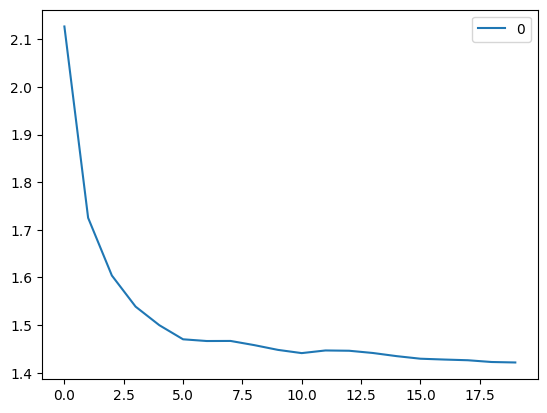

In [13]:
curve = pd.DataFrame(rmse_val)
curve.plot()

### 생각해본 것
1. 20번 반복했는데 최소점이 안 나올 수 있나?
2. data-2 파일과 합쳐서 돌려봤어야 했나?
